In [137]:
%matplotlib inline
from __future__ import division, print_function
from six import StringIO
import xml.etree.ElementTree as etree
import re

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import requests

from svgpath2mpl import parse_path

In [141]:
#r = requests.get('http://thenewcode.com/assets/images/thumbnails/homer-simpson.svg')
with open("img/mouse.svg", "r") as file:
    text = file.read()

tree = etree.parse(StringIO(text))
root = tree.getroot()
width = 10#int(re.match(r'\d+', root.attrib['width']).group())
height = 10#int(re.match(r'\d+', root.attrib['height']).group())
path_elems = root.findall('.//{http://www.w3.org/2000/svg}path')

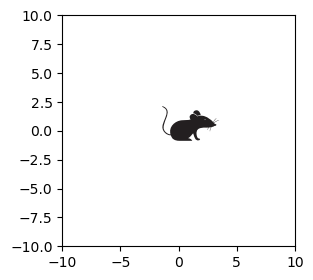

In [149]:
paths = [parse_path(elem.attrib['d']) for elem in path_elems]
facecolors = [elem.attrib.get('fill', 'none') for elem in path_elems]
edgecolors = [elem.attrib.get('stroke', 'none') for elem in path_elems]
linewidths = [elem.attrib.get('stroke_width', 1) for elem in path_elems]
collection = mpl.collections.PathCollection(paths, 
                                      edgecolors=edgecolors, 
                                      linewidths=linewidths,
                                      facecolors=facecolors)

fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot()
collection.set_transform(mpl.transforms.Affine2D().rotate_deg(180)+mpl.transforms.Affine2D().scale(.0025)+mpl.transforms.Affine2D().translate(4,3)+ax.transData)
#mpl.transforms.Affine2D().rotate(1)

ax.add_artist(collection)
ax.set_xlim([-width, width])
ax.set_ylim([-height, height])

fig.savefig("mouse.pdf")